# 데이터프레임 변경(2)

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality.csv'
air = pd.read_csv(path)

# 확인
air.head()

# 1. 결측치 처리
- NaN 값, 즉 결측치는 정확한 분석 방해
- NaN 값은 제거하든지 다른 값(평균값, 최빈값 등)으로 채워야 합니다.

##### 1) 결측치 찾기
- **.info()**
- **.isnull()**: 결측치면 True, 유효한 값이면 False (=isna())
- **.notnull()**: 결측치면 False, 유효한 값이면 True  (=notna())

- **sum()** 메소드를 사용해 True 값의 개수, 즉 **열의 결측치 개수**를 확인할 수 있습니다.

In [ ]:
# 열의 결측치 개수 확인
air.isna().sum(axis=0)

# True=1, False=0으로 집계돼서 결측지를 다 더해서 나오는 값

In [ ]:
# 열의 결측지 시각화
air.isna().sum().plot(kind='bar')
plt.show()

In [ ]:
# 열의 결측치 백분율로 확인(%로 표시)
air.isna().sum(axis=0) / len(air) * 100

$ $

# 2. 결측치 제거
- **dropna()** 메소드로 결측치가 있는 열이나 행을 제거할 수 있습니다.
- inplace=True 옵션을 지정해야 해당 데이터프레임에 실제로 반영됩니다.
- axis 옵션으로 행을 제거할 지 열을 제거할 지 지정합니다.
    - **axis=0**: 행 제거(기본값)
    - **axis=1**: 열 제거

##### 1) 결측치가 있는 행 제거
- dropna() 메소드는 기본적으로 어느 열이든 결측치가 있는 행을 제거합니다.

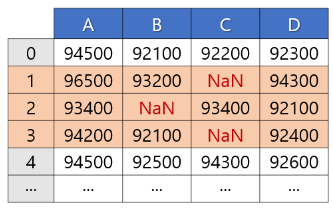

In [ ]:
#####  복사    ############
# a = [1, 2, 3, 4, 5]

# b=a         --> a가 변경되면 b도 변경, 같은 속성
# c = a[:]    --> 완벽하게 떨어진 복사가 됨, a가 변경되도 c에 영향x (완전 복사)
# c = a.copy()  ---> 완벽하게 떨어진 복사가 됨, a가 변경되도 c에 영향x (완전 복사)

In [ ]:
# 완전 복사 해놓기. 
air_test = air

In [ ]:
# 결측치가 하나라도 있는 행 제거
air_test.dropna(axis=0, inplace=True)  # 행 삭제

# 확인
air_test.isna().sum()  # 결측치 있는 행 삭제해서 남은 결측치는 0

##### 2) 특정 열에 결측치가 있는 행 제거
- subset옵션에 열을 지정해 해당 열에 결측치가 있는 행을 제거

In [ ]:
# 데이터프레임 복사
air_test = air.copy()

# Ozone 열이 결측치인 행 제거
air_test.dropna(subset=['Ozone'], axis=0, inplace=True)

# 확인
air_test.isna.sum()

##### 3) 결측치가 있는 모든 열 제거
- axis=1 옵션을 지정해 열을 제거

In [ ]:
# 데이터프레임 복사
air_test = air.copy()

# 결측치가 있는 열 제거
air_test.dropna(axis=1, inplace=True)

# 확인
air_test.isna().sum()

$ $

$ $

# 3. 결측치 채우기
- **.fillna()** 메소드를 사용해 결측치를 다른 값으로 채울 수 있음

##### 1) 평균값으로 채우기

In [ ]:
# 데이터프레임 복사
air_test = air.copy()

# Ozone 평균 구하기
mean_Ozone = air_test['Ozone'].mean()

# 결측치를 평균값으로 채우기  
air_test['Ozone'].fillna(mean_Ozone, inplace=True)  # Ozone값만 Ozone 평균으로 채움


# 확인
air_test.isna().sum()

##### 2) 특정 값으로 채우기

In [ ]:
# Solar.R 열의 누락된 값을 0으로 채우기
air_test['Solar.R'].fillna(0, inplace=True)

# 확인
air_test.isna().sum()


##### 3) 직전 행의 값, 다음 행의 값으로 채우기
- 결측치를 바로 앞의 값이나 바로 다음에 나오는 값으로 채웁니다.
- 날짜 또는 시간의 흐름에 따른 값을 갖는 시계열 데이터 처리시 유용합니다.
- **method='ffill'**: 바로 앞의 값으로 변경(Fowared Fill)
- **method='bfill'**: 바로 다음 값으로 변경(Backwared Fill)

In [ ]:
# 데이터프레임 복사
air_test = air.copy()

# 결측치 확인
air_test.isna().sum()

In [ ]:
# Ozone 열의 누락된 값을 바로 앞의 값으로 채우기
air_test['Ozone'].fillna(method='ffill', inplace=True)

# Solar.R 열의 누락된 값을 바로 뒤의 값으로 채우기
air_test['Solar.R'].fillna(method='bfill', inplace=True)

# 확인
air_test.isna().sum()

##### 4) 선형보간법으로 채우기
- **interpolate()** 메소드를 사용해 선형보간법으로 채울 수 있습니다.

In [ ]:
# 데이터프레임 복사
air_test = air.copy()

# 선형보간법으로 채우기
air_test['Ozone'].interpolate(method='linear', inplace=True)
air_test['Solar.R'].interpolate(method='linear', inplace=True)

# 확인
air_test.isna().sum()

$ $

$ $

# 4. 가변수(Dummy Variable) 만들기

- 가변수는 일정하게 정해진 범위의 값을 갖는 데이터(범주형 데이터)를 독립된 열로 변환한 것입니다.
- 특히 범주형 문자열 데이터는 머신러닝 알고리즘에 사용하려면 숫자로 변환해야 합니다.
- 가변수를 만드는 과정을 **One-Hot-Encoding** 이라고 부르기도 합니다.
- **get_dummies()** 함수를 사용해서 가변수를 쉽게 만들 수 있습니다.

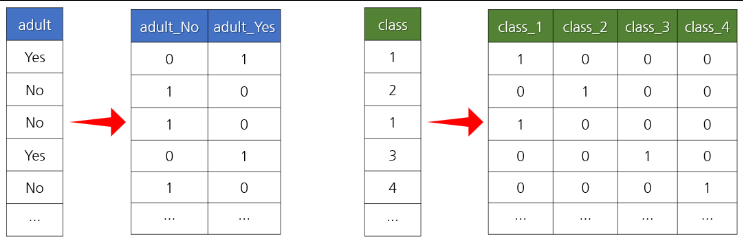

In [ ]:
# adult_No나 adult_Yes는 같은 뜻이기 때문에 한 열 삭제 가능.
# class는 class_2, class_3, class_4 이렇게 3가지를 가지고 class_1을 알 수 있기 때문에
# class_1 삭제 가능. (다중공선성을 제거해줌으로써 통계적 유의성이 높아짐)

In [ ]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/tips.csv'
tip = pd.read_csv(path)

# 확인
tip.head()

##### 1) 범주형 변수 확인

In [ ]:
# 값 개수 확인
tip['day'].value_counts().plot(kind='bar')

##### 2) 변수 개별 처리
- columns 옵션에 열을 하나 지정해 처리할 수 있습니다.
- 자동으로 원본 열이 제거되고, 열 이름이 prefix로 사용됩니다.
- 다중공선성 문제를 없애기 위해 **drop_first=True** 옵션을 지정합니다.

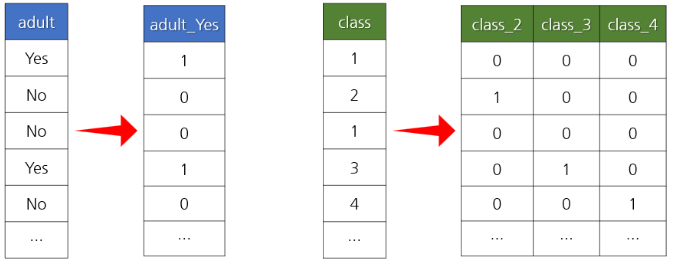

In [ ]:
# 가변수화: sex
# pd.get_dummies(데이터프레임, columns = 열목록, drop_first=True)
tip = pd.get_dummies(tip, columns=['sex'], drop_first=True)

# 확인
tip.head()

##### 3) 일괄 처리
- columns 옵션에 대상 열을 **리스트**로 지정해 한 번에 처리합니다.
- 자동으로 열 이름이 prefix로 지정되며 원본 열이 제거됩니다.
- columns 옵션을 지정하지 않으면 문자열 값을 갖는 열 모두를 대상으로 합니다.

In [ ]:
# 여러 범주형 변수를 가변수화: smoker, day, time
cols = ['smoker', 'day', 'time']
tip = pd.get_dummies(tip, columns=cols, drop_first=True)


# 확인
tip.head()

In [ ]:
####  가변수는 인간이 알아보기엔 불편하고, 머신러닝이 좋아하기 때문에 전처리 마지막 과정에서 사용